In [12]:
import numpy as np
from vedo import dataurl, TetMesh, Points, show, settings, close
from vedo.pyplot import plot

settings.default_backend = "vtk"  # or k3d, vtk, or 2d


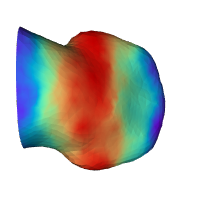

In [2]:
# Load a mesh of a mouse limb at 12 days of development
tmsh = TetMesh(dataurl + "limb.vtu")
tmsh

In [7]:
# Pick 100 points where we measure the value of a gene expression
ids = np.random.randint(0, tmsh.npoints, 100)
pts = tmsh.vertices[ids]        # slice the numpy array
x = pts[:, 1]                  # x coordinates of the points
gene = np.sin((x+150)/500)**2  # we are making this up!


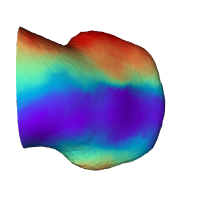

In [8]:
# Create a set of points with those values
points = Points(pts, r=10).cmap("Greens", gene)

# Interpolate the gene data onto the mesh, by averaging the 5 closest points
tmsh.interpolate_data_from(points, n=5)

In [14]:
# Create a graph of the gene expression as function of x-position
gene_plot = plot(x, gene, lw=0, title="Gene expression").clone2d(size=0.5)

# Show the mesh, the points and the graph
msh = tmsh.tomesh(fill=True).cmap("Greens").add_scalarbar()
show(msh, points, gene_plot)#.close()

In [15]:
close()